# NetTech Employee Retention Project, 2019

##### This project aims at checking the factor(s) that causes/cause an employee to leave or stay in the company 

NetTech employee dataset was collected and explored using different methods in pandas library in Python programming language. This was done to check the factor(s) contributing to the unexpected exit(from the company) and why some would not want to leave. Pandas library was also used for visualization and Logistic Regression in Machine Learning for designing the model for prediction. It was evidently observed that these factors: satisfaction level, average monthly hours spent in the company, promotion last five years and the salary level are major factors that cause an employee to either leave or be willing to continue in the company.

Content
1. Data Exploration and Visualization
2. Machine Learning for Modelling and Prediction
3. Conclusion

In [1]:
#import working libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Task 1: Data Exploration and Visualization

In [2]:
#get the dataset and store as employee_data
employee_data = pd.read_csv('HR_comma_sep.csv')

In [13]:
#view the first 10 employee_data
employee_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
#view the last 10 employee_data
employee_data.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [12]:
#view the shape,i.e the number of row and column
employee_data.shape

(14999, 10)

There are 14,999 employees in the company

#### One obvious reason that can cause an employee to leave a company is the salary level not changing for a long period of time e.g 1 year or 2 depending on the company calculation.
#### The salary level is therefore explored

In [50]:
#check if there is any employee that has stayed in the company for only one year
employee_data[employee_data['time_spend_company'] == 1].shape

(0, 10)

All the employee we are considering have spent more than one year

In [49]:
#view the numbers of employee altogether that have a high salary
employee_data[employee_data['salary'] == 'high'].shape

(1237, 10)

1237(less than half,even quarter, of all the employee) are highly paid

In [22]:
#view the numbers of employee altogether that have a medium salary
employee_data[employee_data['salary'] == 'medium'].shape

(6446, 10)

6446 are paid on a medium level 

In [23]:
#view the numbers of employee altogether that have a low salary
employee_data[employee_data['salary'] == 'low'].shape

(7316, 10)

7316 employee are paid low

##### The observation here is that more than 70% of the employee in the company that has worked for more than one year are paid low. This explains why an employee might decide to leave the company.

Using a bar chart for visualizing the above

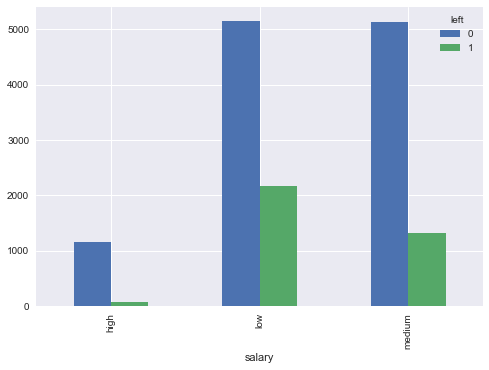

In [90]:
#fig 1
salary_left = pd.crosstab(employee_data['salary'],employee_data['left'])
salary_left.plot(kind='bar')

#### Fig 1 reveals low salary earners as having the highest tendency to leave the company while the high earners are not willing to leave

### Thus, evidently, salary(among others) is a strong factor that determines whether or not an employee stays in the company  

Again, it is observed that the time spent in the company does not determine the level of salary because even some employees that have spent up to 6 years in the company were still paid low while some employee have only spent 2 years and are highly paid.

In [73]:
# 6-year employee but with low pay
employee_data[(employee_data['time_spend_company'] == 6) & (employee_data['salary']=='low')].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
83,0.84,0.85,4,249,6,0,1,0,marketing,low
122,0.75,1.00,4,216,6,0,1,0,technical,low


In [72]:
#two year employee with high pay
employee_data[(employee_data['time_spend_company'] == 2) & (employee_data['salary']=='high')].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2100,0.56,0.94,4,215,2,0,0,0,technical,high
2139,0.71,0.76,5,172,2,1,0,0,support,high
2217,0.56,0.97,5,163,2,0,0,0,management,high
2256,0.95,0.69,3,225,2,0,0,0,technical,high
2295,1.00,0.86,4,161,2,0,0,0,marketing,high


In [75]:
#In fact, some 10 year old employee are still having low pay
employee_data[(employee_data['time_spend_company'] == 10) & (employee_data['salary']=='low')].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11195,0.47,0.79,3,284,10,0,0,0,sales,low
11198,0.56,0.87,3,146,10,0,0,0,sales,low
11199,0.84,0.85,4,207,10,0,0,0,sales,low
11226,0.57,1.00,4,227,10,0,0,0,technical,low


#### Evidently, time spent in the company does not really determine whether or not a staff will stay in the company

In [82]:
#check the various departments
x_department = employee_data['Department'].value_counts().keys().to_list()
x_department

['sales',
 'technical',
 'support',
 'IT',
 'product_mng',
 'marketing',
 'RandD',
 'accounting',
 'hr',
 'management']

In [3]:
#group by departmwent
group_by_department = employee_data.groupby('Department').sum()
group_by_department

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


#### Observations
    Sales department :
    1. had the largest number of employee that left
    2. had the highest satisfaction level
    3. worked most and spent the highest number of time
    4. had the highest number of accidents
#### Satisfaction level, in the management department, is the lowest yet the lowest number of people that lleft the company is from management department . Sales department has the highest satisfaction level yet the department still had the the highest number of people that left. In view of this, 'Department', is not a good factor in determining whether or not an employee leaves the company

Grouping by the 'left' column with the mean of the other columns

In [92]:
#table 2
employee_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Clearly from table 2, there is a considerable difference between those that left(1) and those that did not(0) in
1. satisfaction_level
2. average_monthly_hours and
3. promotion_last_5years

#### So the strong factors that determine whether or not an employee leaves are:
1. Satisfaction level
2. Average monthly hours
3. Promotion last 5 years
4. Salary

These are the factors that would be used as the independent variable in the model

For a dependable future prediction ,we build a model using machine learning
### Task 2: Machine Learning

The 'satisfaction_level','average_monthly_hours','promotion_last_5years','salary' are used as the independent variable against 'left'(depentment variable) in our model using Logistic Regression. 

In [96]:
#view the independadent table 
df_table = employee_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_table.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


First, we need to change the salary column values from text to numbers.

In [174]:
#use dummies variable on salary column
salary_dummies = pd.get_dummies(df_table['salary'],prefix='Salary')
salary_dummies.head()

,Salary_high,Salary_low,Salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


Join the salaries_dummies and the df_table

In [112]:
df_X = pd.concat([df_table,salary_dummies],axis='columns')
df_X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Drop the salary column since we already have the salary levels

In [113]:
df_X.drop(['salary'],axis='columns', inplace=True)
df_X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [76]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

In [130]:
#get the variable for the model
y = employee_data.left
X = df_X

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10499, 6), (4500, 6), (10499,), (4500,))

In [162]:
#make an instance of logical regression
model = LogisticRegression()


In [163]:
#train the model
model.fit(X_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#recall the employee_data
df_X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [125]:
#check the highest satisfaction_level and the lowest
employee_data['satisfaction_level'].max(), employee_data['satisfaction_level'].min()

(1.0, 0.09)

In [127]:
#check the highest average_montly_hours and the lowest
employee_data['average_montly_hours'].max(), employee_data['average_montly_hours'].min()

(310, 96)

Some predictions

What will be the decision of an employee if:
1. Satisfaction_level = 2(very high,recall from above table that highest satisfaction_level is 1)
2. average_monthly_hours = 150(almost average)
3. promotion_last_5years = 1 (true)
4. Salary_low = 0 (not cosidered)
5. Salary_medium = 0 (not considered)
6. Salary_high = 1(high)
7. Format is model.predict([satisfaction_level,average_monthly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium])

In [171]:
model.predict([[2,150,1,1,0,0]])

array([0], dtype=int64)

From the above prediction, the employee will not leave

Predict with 
1. satisfaction_level = 0.1(very low)
2. average_monthly_hours = 200(high)
3. promotion_last_5years = 0(No promotion)
4. Salary_low = 1(True)
5. Salary_medium = 0(False)
6. Salary_high = 0(False)
7. Format is model.predict([satisfaction_level,average_monthly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium])

In [172]:
model.predict([[0.1,200,0,0,1,0]])

array([1], dtype=int64)

The model predicts that this employee will leave the company

#### Thus, the model is accurate

In [165]:
#Evaluating the model for accuracy
#test the accuracy
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7738832269739975, 0.7788888888888889)

#### Again, the score is good for accuracy

### Conclusion

The satisfaction_level, average_monthly_hours, promotion_last_5years and salary are the major factors to be considered in determining whether or not an employee will stay or leave the company 